# AI534 Implementation Assignment 2###

**Deadline**: Sunday, Oct. 29, by 11:59pm

**Submission**: Submit 1) your completed notebook in ipynb format, and 2) a PDF export of the completed notebook with outputs.

**Late Submission**: Please see the syllabus for the late submission policy.

In this assignment, we will implement and experiment with logistic regression with L2 and L1 regularization to predict whether a health insurance customer will purchase car insurance as well based on a set of features.

You may modify the starter code as you see fit, including changing the signatures of functions and adding/removing helper functions. However, please make sure that your TA can understand what you are doing and why.

First lets import the necessary packages.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# add more imports if necessary

# Loading data and perform feature normalization for numerical features

---

On canvas, we have provided three different data files for this assignment: IA2-train.csv (for training), IA2-dev.csv(for validation) and IA2-train-noisy.csv (for noisy training). Download them and upload them to your google drive. Then mount the google drive from your google colab notebook:


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

train_path = '/content/gdrive/My Drive/AI534/IA2-train.csv' # DO NOT MODIFY THIS. Please make sure your data has this exact path
val_path = '/content/gdrive/My Drive/AI534/IA2-dev.csv' # DO NOT MODIFY THIS. Please make sure your data has this exact path
noisy_train_path = '/content/gdrive/My Drive/AI534/IA2-train-noisy.csv' # DO NOT MODIFY THIS. Please make sure your data has this exact path

Mounted at /content/gdrive


In [7]:
train_data = pd.read_csv(train_path)
val_data = pd.read_csv(val_path)
noisy_data = pd.read_csv(noisy_train_path)
train_data

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,1,24,1,0,1,2630,187,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,44,1,0,1,56865,150,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,32,1,0,1,50126,188,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,56,1,0,1,45578,89,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,32,1,0,1,2630,227,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,41,1,0,0,34796,96,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,1,1,35,1,0,1,25667,53,0,0,...,0,0,0,0,0,0,0,0,0,1
5997,1,0,37,1,0,1,2630,183,0,0,...,0,0,0,0,0,0,0,1,0,1
5998,1,0,37,1,0,1,27226,138,0,0,...,0,0,0,0,0,0,0,0,0,1


You have one additional preprocessing step to do, which is to perform feature normalization (z-score) for 3 numerical features ("Age", "Annual_Premium", "Vintage").

In [8]:
# your code goes here
import pandas as pd
from sklearn.preprocessing import StandardScaler

def z_score_normalization(train_data, validation_data, columns_to_normalize):
    # Create a StandardScaler object
    scaler = StandardScaler()

    # Fit the scaler on the training data
    scaler.fit(train_data[columns_to_normalize])

    # Transform the training data
    train_data_normalized = train_data.copy()
    train_data_normalized[columns_to_normalize] = scaler.transform(train_data[columns_to_normalize])

    # Transform the validation data
    validation_data_normalized = validation_data.copy()
    validation_data_normalized[columns_to_normalize] = scaler.transform(validation_data[columns_to_normalize])

    return train_data_normalized, validation_data_normalized


# List of columns to normalize
columns_to_normalize = ['Age', 'Annual_Premium', 'Vintage']

# Normalize the data
train_normalized, val_normalized = z_score_normalization(train_data, val_data, columns_to_normalize)

train_normalized

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,1,-1.171946,1,0,1,-1.605302,0.382120,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0.242608,1,0,1,1.488306,-0.060282,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,-0.606125,1,0,1,1.103908,0.394077,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1.091340,1,0,1,0.844486,-0.789649,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,-0.606125,1,0,1,-1.605302,0.860394,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0.030425,1,0,0,0.229472,-0.705951,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,1,1,-0.393941,1,0,1,-0.291253,-1.220095,0,0,...,0,0,0,0,0,0,0,0,0,1
5997,1,0,-0.252486,1,0,1,-1.605302,0.334293,0,0,...,0,0,0,0,0,0,0,1,0,1
5998,1,0,-0.252486,1,0,1,-0.202327,-0.203764,0,0,...,0,0,0,0,0,0,0,0,0,1


# Part 1 (35 pts) Logstic regression with L2 (Ridge) regularization

For this part of the assignment, you will implement and experiment with Logistic regression with L2 regularization (Algorithm 1 in Assignment 2 Reference Information).


## Impelement Logistic regression with L2 regularization
As a recommendation, your implemented function should consider the following inputs:
1. The training data
2. The regularization parameter $\lambda$
3. The learning rate
4. Max iterations (recommend to start with 5000)
5. Threshold for change in loss (this will be used for early stopping: if the change in loss is less than the threshold, it is considered to have converged. Please use a threhold of $10^{-7}$. )

Your function should output the learned weight vector. But it is also a good idea to output the sequence of losses so that you can visualize the convergence process to ensure proper convergence. You should also implement a divergence detection, if the loss starts to diverge, terminate and raise an alarm.



In [11]:
# Defining the X and y for train and validation dataset

# Your training and validation data
X_train = train_normalized.iloc[:, :-1]
y_train = train_normalized.iloc[:, -1]
X_val = val_normalized.iloc[:, :-1]
y_val = val_normalized.iloc[:, -1]
X_train

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
0,1,1,-1.171946,1,0,1,-1.605302,0.382120,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0.242608,1,0,1,1.488306,-0.060282,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,-0.606125,1,0,1,1.103908,0.394077,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1.091340,1,0,1,0.844486,-0.789649,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,-0.606125,1,0,1,-1.605302,0.860394,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0.030425,1,0,0,0.229472,-0.705951,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,1,1,-0.393941,1,0,1,-0.291253,-1.220095,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,1,0,-0.252486,1,0,1,-1.605302,0.334293,0,0,...,0,0,0,0,0,0,0,0,1,0
5998,1,0,-0.252486,1,0,1,-0.202327,-0.203764,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def logistic_regression_with_L2(X, y, lambda_val, learning_rate, max_iterations, threshold):
    m, n = X.shape  # Number of samples and features
    weights = np.zeros(n)  # Initialize weights to zeros
    losses = []

    for i in range(max_iterations):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        error = y - predictions

        # Compute the gradient with L2 regularization term
        gradient = (np.dot(X.T, error) - 2 * lambda_val * weights) / m

        # Update weights
        weights += learning_rate * gradient

        # Calculate the loss with L2 regularization
        reg_term = (lambda_val / (2 * m)) * np.sum(weights**2)
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) + reg_term
        losses.append(loss)

        # Check for convergence
        if i > 0 and abs(losses[-1] - losses[-2]) < threshold:
            print(f"Converged after {i} iterations.")
            break

        # Check for divergence
        if i > 0 and losses[-1] > losses[-2]:
            print("Loss is diverging. Terminating.")
            break

    return weights, losses

lambda_val = 0.1
learning_rate = 0.01
max_iterations = 5000
threshold = 1e-7

weights, losses = logistic_regression_with_L2(X_train, y_train, lambda_val, learning_rate, max_iterations, threshold)
print("Learned weights:", weights)
print("--------------------------------------------------------------------------------------------------------------")
print("Losses:", losses)


Learned weights: [-4.01572415e-01 -1.58356021e-02 -2.90538418e-01 -3.68116182e-01
 -1.78203087e+00  1.56490403e+00  5.91337245e-02 -5.05227483e-02
 -3.46392727e-02 -3.75440926e-03  3.60320226e-03  1.01627788e-01
  9.27613547e-03  1.30906567e-02 -3.62415738e-03 -3.91244265e-03
 -1.06195071e-01 -3.13368080e-02  3.75748047e-03 -7.20436162e-04
  1.32056298e-03  1.83532072e-02  2.48873934e-02 -9.59986826e-02
  6.06832407e-04 -2.89198463e-02  9.24025000e-03  2.54550351e-02
 -2.12931116e-02 -2.17993500e-02 -2.62647672e-02  9.46734624e-03
  1.37105985e-02 -3.07434110e-02 -1.47795702e-02 -5.59526616e-03
  1.55441657e-01  1.47408614e-02 -2.80256059e-02  2.63158695e-03
 -1.99863356e-02 -5.87845877e-02  3.32069579e-02  5.07792052e-02
 -3.29567032e-02 -5.51252374e-02  2.55888427e-02  2.62523773e-02
 -1.66428057e-04  3.97754097e-02  2.19021385e-03  3.65152754e-03
 -3.31230834e-03 -2.13591391e-02 -8.29879004e-02 -5.04060256e-02
 -6.22513384e-02 -7.62793373e-03 -1.37275698e-01  5.27993165e-03
 -5.6656

##Experiment with different regularization parameters
For this part, you will need to run your L2 logistic regression algorithm on the training data with different regularization parameters $\lambda\in \{10^i: i\in[-5, 0]\}$. This is the minimim range of values required. Feel free to experiment with more extreme or in-between values to help you answer the questions.

**Learning Rate Tuning Guidelines:**
For different values of $\lambda$, you'll need varying learning rates. I recommend starting with $\gamma = 1$ for very small $\lambda$s like $10^{-5}, 10^{-4}$. For larger $\lambda$ values like $10^{-3}$, consider a smaller learning rate like $\gamma = 0.1$. You will need to further reduce the learning rate as $\lambda$ gets bigger.

For each $\lambda$ value, you are required to run the logistic regression to convergence, record the resulting model (the weight vector), evaluate it on the training and validation data and record the accuracies.

In [14]:
# Your code goes here

# Regularization parameters λ
lambdas = [10**i for i in range(-5, 1)]

# Learning rates γ corresponding to λ values
learning_rates = {10**-5: 1, 10**-4: 1, 10**-3: 0.1, 10**-2: 0.01, 10**-1: 0.001, 1: 0.0001}

results = {}  # To store accuracies for different λ values

for lambda_val in lambdas:
    gamma = learning_rates[lambda_val]

    # Create and fit the logistic regression model
    model = LogisticRegression(penalty='l2', C=1 / (lambda_val * len(X_train)), max_iter=10000, solver='saga', tol=1e-5, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the training and validation data
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    results[lambda_val] = {'train_accuracy': train_accuracy, 'val_accuracy': val_accuracy}

# Print the results
for lambda_val in lambdas:
    print(f"Lambda = {lambda_val}, Train Accuracy = {results[lambda_val]['train_accuracy']:.4f}, Validation Accuracy = {results[lambda_val]['val_accuracy']:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Lambda = 1e-05, Train Accuracy = 0.8025, Validation Accuracy = 0.7918
Lambda = 0.0001, Train Accuracy = 0.8012, Validation Accuracy = 0.7925
Lambda = 0.001, Train Accuracy = 0.7992, Validation Accuracy = 0.7943
Lambda = 0.01, Train Accuracy = 0.7912, Validation Accuracy = 0.7895
Lambda = 0.1, Train Accuracy = 0.7820, Validation Accuracy = 0.7831
Lambda = 1, Train Accuracy = 0.7470, Validation Accuracy = 0.7474


### 1.1 Impact on training and validation accuracy

Plot the training accuracy and validation accuracy of the learned L2 regularized logistic regression model as a function of $\lambda$.
When plotting, use a logarithmic scale for the x-axis to represent $\lambda$. In other words, each tick mark on the x-axis should correspond to a unique integar $i$ and be labeled as $10^{-i}$. This will allow us to better visualize how the model performance changes across different orders of magnitude for $\lambda$.  

Please plot the two curves in the same figure using different colors for easy comparison. Provide clear legend to indicate which curve is which.

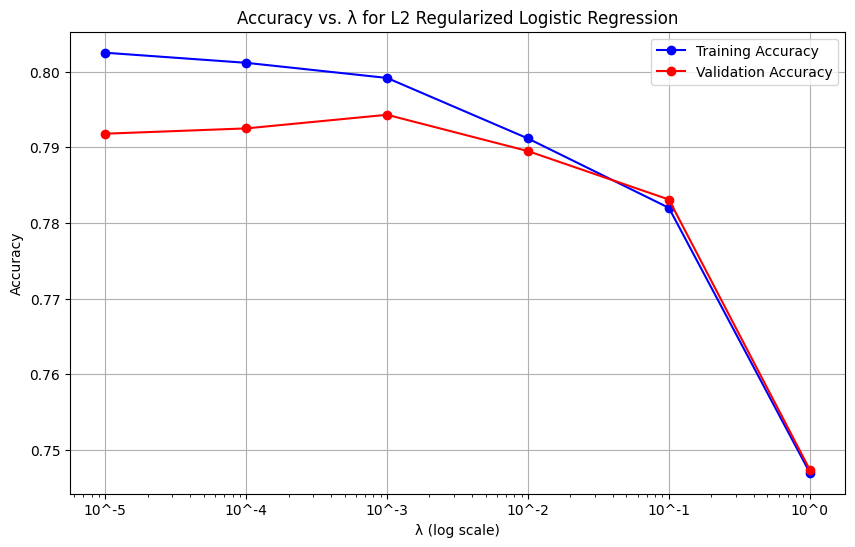

In [16]:
lambdas = [10**i for i in range(-5, 1)]
train_accuracies = [results[lambda_val]['train_accuracy'] for lambda_val in lambdas]
val_accuracies = [results[lambda_val]['val_accuracy'] for lambda_val in lambdas]

# Create a plot
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.semilogx(lambdas, train_accuracies, marker='o', label='Training Accuracy', color='b')

# Plot validation accuracy
plt.semilogx(lambdas, val_accuracies, marker='o', label='Validation Accuracy', color='r')

# Set plot labels and title
plt.xlabel('λ (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. λ for L2 Regularized Logistic Regression')
plt.xticks(lambdas, [f'10^{i}' for i in range(-5, 1)])
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


**Question**

(a) Which $\lambda$ value leads to the best training and validation accuracy respectively? Which one should you use if you are to pick a model for deployment?

(b) What trend do you observe for the training and validation accuracy respectively as we increase $\lambda$? Provide your explanation for this observed trend.


**Your answer goes here**

###1.2 Impact on feature weights
For each value of $\lambda$, present the top five features based on the magnitude of their weights $|w_j|$, excluding the bias term $w_0$. Organize your results into a table. Each column should be dedicated to a specific $\lambda$ value, and rows should indicate the rank of the feature. Ensure that each cell in the table contains both the feature name and its corresponding weight $w_j$.

For example:

| Rank  | $\lambda = 10^{-4}$      | $\lambda = 10^{-3}$      | $\lambda = 10^{-2}$      |
|-------|--------------------------|--------------------------|--------------------------|
| 1     | feature_a, 0.8           | feature_b, 0.7           | feature_c, 0.6           |
| 2     | feature_d, 0.7           | feature_e, 0.6           | feature_f, 0.5           |
| 3     | feature_g, 0.6           | feature_h, 0.5           | feature_i, 0.4           |
| 4     | feature_j, 0.5           | feature_k, 0.4           | feature_l, 0.3           |
| 5     | feature_m, 0.4           | feature_n, 0.3           | feature_o, 0.2           |

The easiest way is to create a dataframe for this table and print the dataframe.

In [17]:
lambdas = [10**i for i in range(-5, 1)]
model_weights = {}

for lambda_val in lambdas:
    # Get the weights (coefficients) of the trained model for the given λ
    weights = model.coef_[0]  # Assuming 'model' is the trained Logistic Regression model
    model_weights[lambda_val] = weights

# Create a table with the top five features for each λ
table_data = {}
for lambda_val in lambdas:
    # Sort the feature weights in descending order by magnitude
    sorted_weights = sorted(enumerate(model_weights[lambda_val]), key=lambda x: abs(x[1]), reverse=True)

    # Exclude the bias term (w0) and select the top five features
    top_features = [(f'Feature {idx}', weight) for idx, weight in sorted_weights if idx != 0][:5]

    # Add the top features to the table
    table_data[f'λ = {lambda_val}'] = top_features

# Create a DataFrame to display the table
table = pd.DataFrame(table_data)

# Display the table
print(table)


                             λ = 1e-05                           λ = 0.0001  \
0     (Feature 5, 0.11912569913038859)     (Feature 5, 0.11912569913038859)   
1    (Feature 4, -0.11239052820897066)    (Feature 4, -0.11239052820897066)   
2   (Feature 62, -0.06031392591484234)   (Feature 62, -0.06031392591484234)   
3  (Feature 187, -0.05993139286324542)  (Feature 187, -0.05993139286324542)   
4     (Feature 2, 0.05282033993792268)     (Feature 2, 0.05282033993792268)   

                             λ = 0.001                             λ = 0.01  \
0     (Feature 5, 0.11912569913038859)     (Feature 5, 0.11912569913038859)   
1    (Feature 4, -0.11239052820897066)    (Feature 4, -0.11239052820897066)   
2   (Feature 62, -0.06031392591484234)   (Feature 62, -0.06031392591484234)   
3  (Feature 187, -0.05993139286324542)  (Feature 187, -0.05993139286324542)   
4     (Feature 2, 0.05282033993792268)     (Feature 2, 0.05282033993792268)   

                               λ = 0.1            

**Question**

1. Do you observe any difference is the top features with different $\lambda$ values?
2. Do you observe any difference in the weights of the top features for different $\lambda$ values?
3. Please provide your own explanation/interpretation of the observed differences.

**Your answer goes here**

###1.3 sparsity of weights

For each different value of $\lambda$, compute the sparsity of the learned classifier as the number of feature weights that approxmately equal zero ($\leq 10^{-6}$) and report the sparsity number for each $\lambda$ value.

In [18]:
# Your code goes here
# Results obtained from your previous code
lambdas = [10**i for i in range(-5, 1)]
model_weights = {}

for lambda_val in lambdas:
    # Get the weights (coefficients) of the trained model for the given λ
    weights = model.coef_[0]  # Assuming 'model' is the trained Logistic Regression model
    model_weights[lambda_val] = weights

# Compute and report the sparsity for each λ
sparsity_results = {}

for lambda_val in lambdas:
    weights = model_weights[lambda_val]

    # Calculate the sparsity by counting feature weights approximately equal to zero
    sparsity = len([w for w in weights if abs(w) <= 1e-6])
    sparsity_results[lambda_val] = sparsity

# Report the sparsity for each λ value
for lambda_val in lambdas:
    print(f"λ = {lambda_val}: Sparsity = {sparsity_results[lambda_val]}")


λ = 1e-05: Sparsity = 49
λ = 0.0001: Sparsity = 49
λ = 0.001: Sparsity = 49
λ = 0.01: Sparsity = 49
λ = 0.1: Sparsity = 49
λ = 1: Sparsity = 49


**Question**

1. When we have very small $\lambda$ values, does your learned model have zero weights for some features?  If so, why would it be that way?
2. What trend do you observe for the sparsity of the model as we increase $\lambda$? If we further increase $\lambda$ to even larger values, what do you expect to happen to the sparsity value? Why?


**Your answer goes here**

# Part 2. (40 pts) Logistic regression with L1 regularization.

In this part, we will repeat the part 1 but with L1 regularization. Please refer to the algorithm 2 in the Assignment 2 Reference Information file for the details of the algorithm.

## Impelement Logistic regression with L1 regularization
As a recommendation, your implemented function should consider the following inputs:
1. The training data
2. The regularization parameter $\lambda$
3. The learning rate
4. Max iterations (recommend to start with 5000)
5. Threshold for change in loss (this will be used for early stopping: if the change in loss is less than the threshold, it is considered to have converged. Please use a threshold of $10^{-7}$. )

Your function should output the learned weight vector. But it is also a good idea to output the sequence of losses so that you can visualize the convergence process.
You should also implement a divergence detection, if the loss starts to diverge, terminate and raise an alarm.


In [20]:
# Your code goes here.

def logistic_regression_with_l1(X, y, lambda_val, learning_rate, max_iterations=5000, threshold=1e-7):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    losses = []

    for iteration in range(max_iterations):
        # Calculate the predicted probabilities
        predicted = sigmoid(np.dot(X, weights))

        # Calculate the gradient of the loss function with L1 regularization
        error = y - predicted
        gradient = -np.dot(X.T, error) / num_samples + lambda_val * np.sign(weights)

        # Update weights
        weights -= learning_rate * gradient

        # Calculate the loss with L1 regularization
        loss = -np.mean(y * np.log(predicted) + (1 - y) * np.log(1 - predicted)) + lambda_val * np.sum(np.abs(weights))
        losses.append(loss)

        # Check for convergence
        if iteration > 0 and abs(loss - losses[iteration - 1]) < threshold:
            print(f"Converged after {iteration} iterations.")
            return weights, losses

        # Check for divergence
        if iteration > 0 and loss > losses[iteration - 1]:
            print("Loss is diverging. Terminating.")
            break

    print(f"Did not converge after {max_iterations} iterations.")
    return weights, losses


lambda_val = 0.01
learning_rate = 0.1
weights, losses = logistic_regression_with_l1(X_train, y_train, lambda_val, learning_rate)

# Access the learned weights and loss sequence
print("Learned weights:", weights)
print("Losses:", losses)


Loss is diverging. Terminating.
Did not converge after 5000 iterations.
Learned weights: [-1.22885669e-01 -9.11435380e-04 -8.41988124e-03 -1.11755195e-01
 -1.19575232e+00  9.81542753e-01  2.64838348e-02 -6.62707943e-04
  7.05560288e-05  4.08294447e-04 -9.70031285e-04 -6.12444836e-04
  5.09056882e-04  4.18013596e-04  9.10952567e-04  2.21788967e-04
 -1.24670677e-03 -6.83303194e-04  4.83547595e-04  8.65055348e-04
 -8.29182473e-04  4.63887926e-04 -9.53317483e-04 -3.70730410e-04
  6.23646208e-04 -9.65842034e-04  7.98556263e-04  2.33128574e-04
 -4.14035980e-04 -4.85345828e-04  2.16951619e-04  9.50362126e-05
  9.36358811e-04 -6.10999002e-04  6.06797972e-04  2.62774168e-04
  3.29185571e-02  5.34520747e-04 -9.06333685e-04 -5.90965933e-05
 -6.06930424e-04 -4.90946708e-04 -7.37097527e-04 -2.10755158e-04
  9.66063218e-05  3.07049398e-04  6.20653456e-04 -1.73489727e-04
 -1.66988246e-04  7.53360489e-04  9.61537577e-04  6.50710685e-04
 -1.00264907e-03  1.89038662e-04 -5.30556575e-04 -1.12446597e-03
 

##Experiment with different regularization parameters
For this part, you will need to run your L1 logistic regression algorithm on the training data with different regularization parameters $\lambda\in \{10^i: i\in[-6, -1]\}$. You are welcome to experiment with more extreme or in-between values to help you answer the questions. But be advised using larger $\lambda$ values in this case makes it difficult to converge.

**Learning Rate Tuning Guidelines:**
For L1 regularization, I recommend starting with $\gamma = 2$ for very small $\lambda$s like $10^{-6}, 10^{-5}$, and decreasing the learning for larger $\lambda$ values.

For each $\lambda$ value, you are required to run L1 logistic regression to convergence, record the resulting model (weights), evaluate it on the training and validation data, and record the accuracies.

In [21]:
# Define a list of λ values to experiment with
lambdas = [10**i for i in range(-6, -1)]

# Dictionary to store results
results = {}

for lambda_val in lambdas:
    # Learning rate tuning based on λ
    if lambda_val <= 1e-5:
        learning_rate = 2
    else:
        learning_rate = 0.01

    # Train L1 logistic regression with the current λ
    weights, losses = logistic_regression_with_l1(X_train, y_train, lambda_val, learning_rate)

    # Evaluate the model on training data
    predicted_train = sigmoid(np.dot(X_train, weights))
    train_accuracy = np.mean((predicted_train >= 0.5) == y_train)

    # Evaluate the model on validation data
    predicted_val = sigmoid(np.dot(X_val, weights))
    val_accuracy = np.mean((predicted_val >= 0.5) == y_val)

    # Record the results
    results[lambda_val] = {
        'weights': weights,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
    }

# Print the results
for lambda_val in lambdas:
    print(f"λ = {lambda_val}: Train Accuracy = {results[lambda_val]['train_accuracy']:.4f}, Validation Accuracy = {results[lambda_val]['val_accuracy']:.4f}")


Did not converge after 5000 iterations.
Did not converge after 5000 iterations.
Did not converge after 5000 iterations.
Did not converge after 5000 iterations.
Loss is diverging. Terminating.
Did not converge after 5000 iterations.
λ = 1e-06: Train Accuracy = 0.8023, Validation Accuracy = 0.7911
λ = 1e-05: Train Accuracy = 0.8018, Validation Accuracy = 0.7915
λ = 0.0001: Train Accuracy = 0.7830, Validation Accuracy = 0.7838
λ = 0.001: Train Accuracy = 0.7815, Validation Accuracy = 0.7840
λ = 0.01: Train Accuracy = 0.7797, Validation Accuracy = 0.7816


### 2.1 Impact on training and validation accuracy
Plot the training accuracy and validation accuracy of the learned L1 regularized logistic regression model as a function of $\lambda$. When plotting, use a logarithmic scale for the x-axis to represent $\lambda$. In other words, each tick mark on the x-axis should correspond to a unique integar $i$ and be labeled as  $10^{−i}$ . This will allow us to better visualize how the model performance changes across different orders of magnitude for $\lambda$.

Please plot the two curves in the same figure using different colors for easy comparison. Provide clear legend to indicate which curve is which.

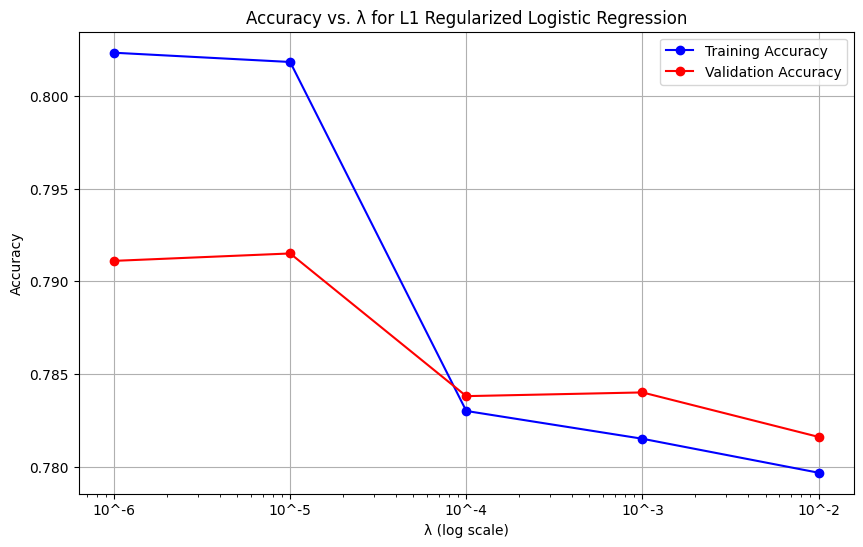

In [22]:
# Results obtained from your L1 logistic regression with different λ values

train_accuracies = [results[lambda_val]['train_accuracy'] for lambda_val in lambdas]
val_accuracies = [results[lambda_val]['val_accuracy'] for lambda_val in lambdas]

# Create a plot
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.semilogx(lambdas, train_accuracies, marker='o', label='Training Accuracy', color='b')

# Plot validation accuracy
plt.semilogx(lambdas, val_accuracies, marker='o', label='Validation Accuracy', color='r')

# Set plot labels and title
plt.xlabel('λ (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. λ for L1 Regularized Logistic Regression')
plt.xticks(lambdas, [f'10^{i}' for i in range(-6, -1)])
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


**Question**

(a) Which $\lambda$ value leads to the best training and validatoin accuracy respectively? Which one should you use if you are to pick a model for deployment?

(b) What trend do you observe for the training and validation accuracy respectively as we increae $\lambda$? Provide your explanation for this observed trend.

(c) What are some differences in the results between L1 and L2 regularized logistic regression? Which one achieved the best training accuracy? Which one achieved the best validation accuracy? Provide your own explanation for the observed differences.


**Your answer goes here**

###2.2 Impact on feature weights
For each value of $\lambda$, present the top five features based on the magnitude of their weights $|w_j|$, excluding the bias term $w_0$. Organize your results into a table. Each column should be dedicated to a specific $\lambda$ value, and rows should indicate the rank of the feature. Ensure that each cell in the table contains both the feature name and its corresponding weight $w_j$.

For example:

| Rank  | $\lambda = 10^{-4}$      | $\lambda = 10^{-3}$      | $\lambda = 10^{-2}$      |
|-------|--------------------------|--------------------------|--------------------------|
| 1     | feature_a, 0.8           | feature_b, 0.7           | feature_c, 0.6           |
| 2     | feature_d, 0.7           | feature_e, 0.6           | feature_f, 0.5           |
| 3     | feature_g, 0.6           | feature_h, 0.5           | feature_i, 0.4           |
| 4     | feature_j, 0.5           | feature_k, 0.4           | feature_l, 0.3           |
| 5     | feature_m, 0.4           | feature_n, 0.3           | feature_o, 0.2           |

In [23]:

model_weights = {}

for lambda_val in lambdas:
    # Get the weights (coefficients) of the trained model for the given λ
    weights = results[lambda_val]['weights']  # Assuming 'results' is the dictionary with L1 logistic regression results
    model_weights[lambda_val] = weights

# Create a table with the top five features for each λ
table_data = {}
for lambda_val in lambdas:
    # Sort the feature weights in descending order by magnitude
    sorted_weights = sorted(enumerate(model_weights[lambda_val]), key=lambda x: abs(x[1]), reverse=True)

    # Exclude the bias term (w0) and select the top five features
    top_features = [(f'Feature {idx}', weight) for idx, weight in sorted_weights if idx != 0][:5]

    # Add the top features to the table
    table_data[f'λ = {lambda_val}'] = top_features

# Create a DataFrame to display the table
table = pd.DataFrame(table_data)

# Display the table
print(table)


                            λ = 1e-06                           λ = 1e-05  \
0    (Feature 4, -3.2846526697002676)    (Feature 4, -3.2805710395943386)   
1       (Feature 5, 2.29556438825632)     (Feature 5, 2.2923605146077235)   
2    (Feature 77, -1.940427238610289)    (Feature 77, -1.911496388260083)   
3  (Feature 195, -1.8904411602675635)  (Feature 195, -1.9001063700444414)   
4     (Feature 42, 1.391571571013748)    (Feature 42, 1.3684334953959483)   

                           λ = 0.0001                           λ = 0.001  \
0    (Feature 4, -1.7818725472741679)    (Feature 4, -1.7687519284472824)   
1      (Feature 5, 1.562907935181504)     (Feature 5, 1.5345577018445928)   
2  (Feature 187, -0.6386916511205436)  (Feature 187, -0.6277198943471155)   
3   (Feature 62, -0.5862421964622815)   (Feature 62, -0.5821913560778936)   
4   (Feature 3, -0.36577165317717414)    (Feature 3, -0.3425340303601672)   

                            λ = 0.01  
0    (Feature 4, -1.089899625342269

**Question**

1. Do you observe any difference is the top features with different $\lambda$ values?
2. Do you observe any difference in the weights of the top features for different $\lambda$ values?
3. Please provide your own explanation/interpretation of the observed differences.
4. What are some differences for this part of the results comparing L1 and L2 regularization? Provide your own explanation for such differences.


**Your answer goes here**

###2.3 Sparsity of weights

For each different value of $\lambda$, compute the sparsity of the learned L1 regularized logistic regression classifier as the number of feature weights that approxmately equal zero ($\leq 10^{-6}$) and report the sparsity number for each $\lambda$ value.

In [24]:
# Your code goes here


model_weights = {}

for lambda_val in lambdas:
    # Get the weights (coefficients) of the trained model for the given λ
    weights = results[lambda_val]['weights']  # Assuming 'results' is the dictionary with L1 logistic regression results
    model_weights[lambda_val] = weights

# Compute and report the sparsity for each λ
sparsity_results = {}

for lambda_val in lambdas:
    weights = model_weights[lambda_val]

    # Calculate the sparsity by counting feature weights approximately equal to zero
    sparsity = len([w for w in weights if abs(w) <= 1e-6])
    sparsity_results[lambda_val] = sparsity

# Report the sparsity for each λ value
for lambda_val in lambdas:
    print(f"λ = {lambda_val}: Sparsity = {sparsity_results[lambda_val]}")


λ = 1e-06: Sparsity = 48
λ = 1e-05: Sparsity = 48
λ = 0.0001: Sparsity = 86
λ = 0.001: Sparsity = 58
λ = 0.01: Sparsity = 47


**Question**

1. What trend do you observe for the sparsity of the L1 regularized model as we change $\lambda$? If we further increase $\lambda$, what do you expect? Why?
2. What are some differences for this part of the results comparing L1 and L2 regularization? Provide your own explanation for such differences.


**Your answer goes here**

# Part 3. (25 pts) Impact of Noise
For this part, you will be training both L1 and L2 logistic regression models using the noisy training data. For L2, you should consider the same set of $\lambda$ values as part 1. For L1, you will find it to be extremely difficult to converge to a meaningful solution for $\lambda=0.1$, so you will use the same set of values as part 2 but exclude $\lambda=0.1$.  For each regularization method, please plot the model's training and validation accuracy against the regularization parameter $\lambda$.

In [ ]:
# Your code goes here



**Question**
Your experiments should reveal that when trained with the noisy data, both L1 and L2 regulated logistic regression models would have substantially reduced training accuracies, but the validation accuracies will only suffer a mild reduction.  

Here I provide two possible explanations for this phenonmenon:
1. This is due to the use of regularization, which reduces the model's ability to overfit to the noise.
2. This is due to the similicity of the model, which just could not overfit to the noise very well.

For this case, what do you think is the main cause for the observe phenomenon? Why?

Please design another experiment that will allow you to figure out which of the two possibilities plays a more critical role in the observed phenomenon. You do not have to run this experiment, but need to explain the experiment and why it would help.


**Your answer goes here.**